In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ikhsanalfajar","key":"cd943f889af08e53aeff1b694cee17f6"}'}

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [3]:
!kaggle datasets download -d fedesoriano/body-fat-prediction-dataset

  0% 0.00/7.43k [00:00<?, ?B/s]
100% 7.43k/7.43k [00:00<00:00, 26.1MB/s]


In [4]:
!mkdir body-fat-prediction-dataset
!unzip body-fat-prediction-dataset.zip -d body-fat-prediction-dataset
!ls body-fat-prediction-dataset

Archive:  body-fat-prediction-dataset.zip
  inflating: body-fat-prediction-dataset/bodyfat.csv  
bodyfat.csv


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [6]:
df = pd.read_csv('body-fat-prediction-dataset/bodyfat.csv')
df.head()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Density  252 non-null    float64
 1   BodyFat  252 non-null    float64
 2   Age      252 non-null    int64  
 3   Weight   252 non-null    float64
 4   Height   252 non-null    float64
 5   Neck     252 non-null    float64
 6   Chest    252 non-null    float64
 7   Abdomen  252 non-null    float64
 8   Hip      252 non-null    float64
 9   Thigh    252 non-null    float64
 10  Knee     252 non-null    float64
 11  Ankle    252 non-null    float64
 12  Biceps   252 non-null    float64
 13  Forearm  252 non-null    float64
 14  Wrist    252 non-null    float64
dtypes: float64(14), int64(1)
memory usage: 29.7 KB


<Axes: >

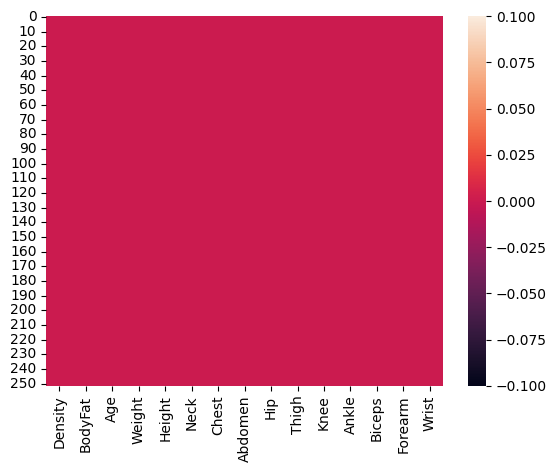

In [8]:
sns.heatmap(df.isnull())

In [9]:
df.describe()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
count,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,1.055574,19.150794,44.884921,178.924405,70.148810,37.992063,100.824206,92.555952,99.904762,59.405952,38.590476,23.102381,32.273413,28.663889,18.229762
std,0.019031,8.368740,12.602040,29.389160,3.662856,2.430913,8.430476,10.783077,7.164058,5.249952,2.411805,1.694893,3.021274,2.020691,0.933585
min,0.995000,0.000000,22.000000,118.500000,29.500000,31.100000,79.300000,69.400000,85.000000,47.200000,33.000000,19.100000,24.800000,21.000000,15.800000
25%,1.041400,12.475000,35.750000,159.000000,68.250000,36.400000,94.350000,84.575000,95.500000,56.000000,36.975000,22.000000,30.200000,27.300000,17.600000
50%,1.054900,19.200000,43.000000,176.500000,70.000000,38.000000,99.650000,90.950000,99.300000,59.000000,38.500000,22.800000,32.050000,28.700000,18.300000
75%,1.070400,25.300000,54.000000,197.000000,72.250000,39.425000,105.375000,99.325000,103.525000,62.350000,39.925000,24.000000,34.325000,30.000000,18.800000
max,1.108900,47.500000,81.000000,363.150000,77.750000,51.200000,136.200000,148.100000,147.700000,87.300000,49.100000,33.900000,45.000000,34.900000,21.400000


<Axes: >

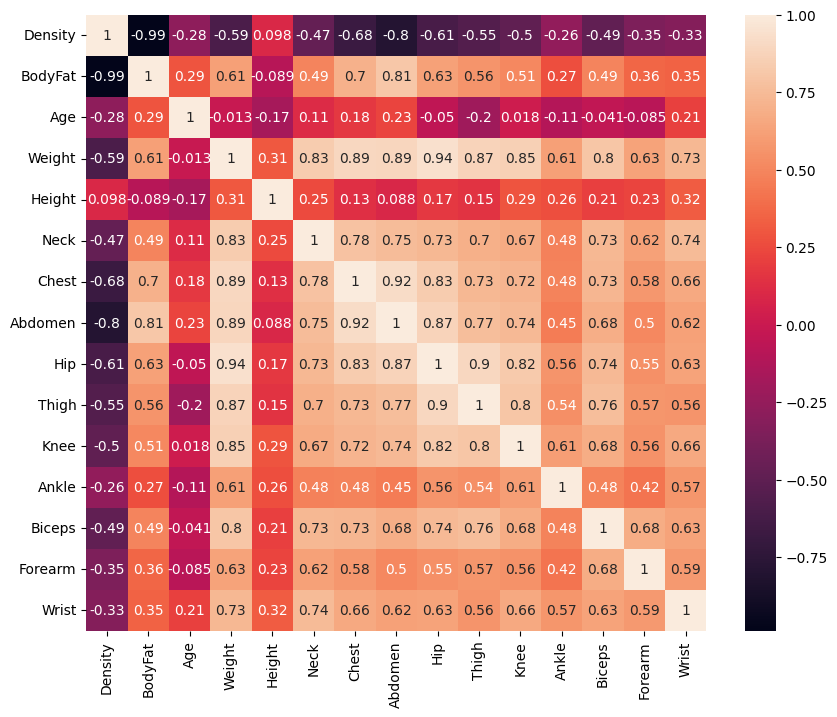

In [10]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)

In [11]:
Berat_badan = df.groupby('Weight').count()[['Age']].sort_values(by='Age').reset_index()
Berat_badan = Berat_badan.rename(columns={'Age':'Berat_badan'})

<Axes: xlabel='Weight', ylabel='Berat_badan'>

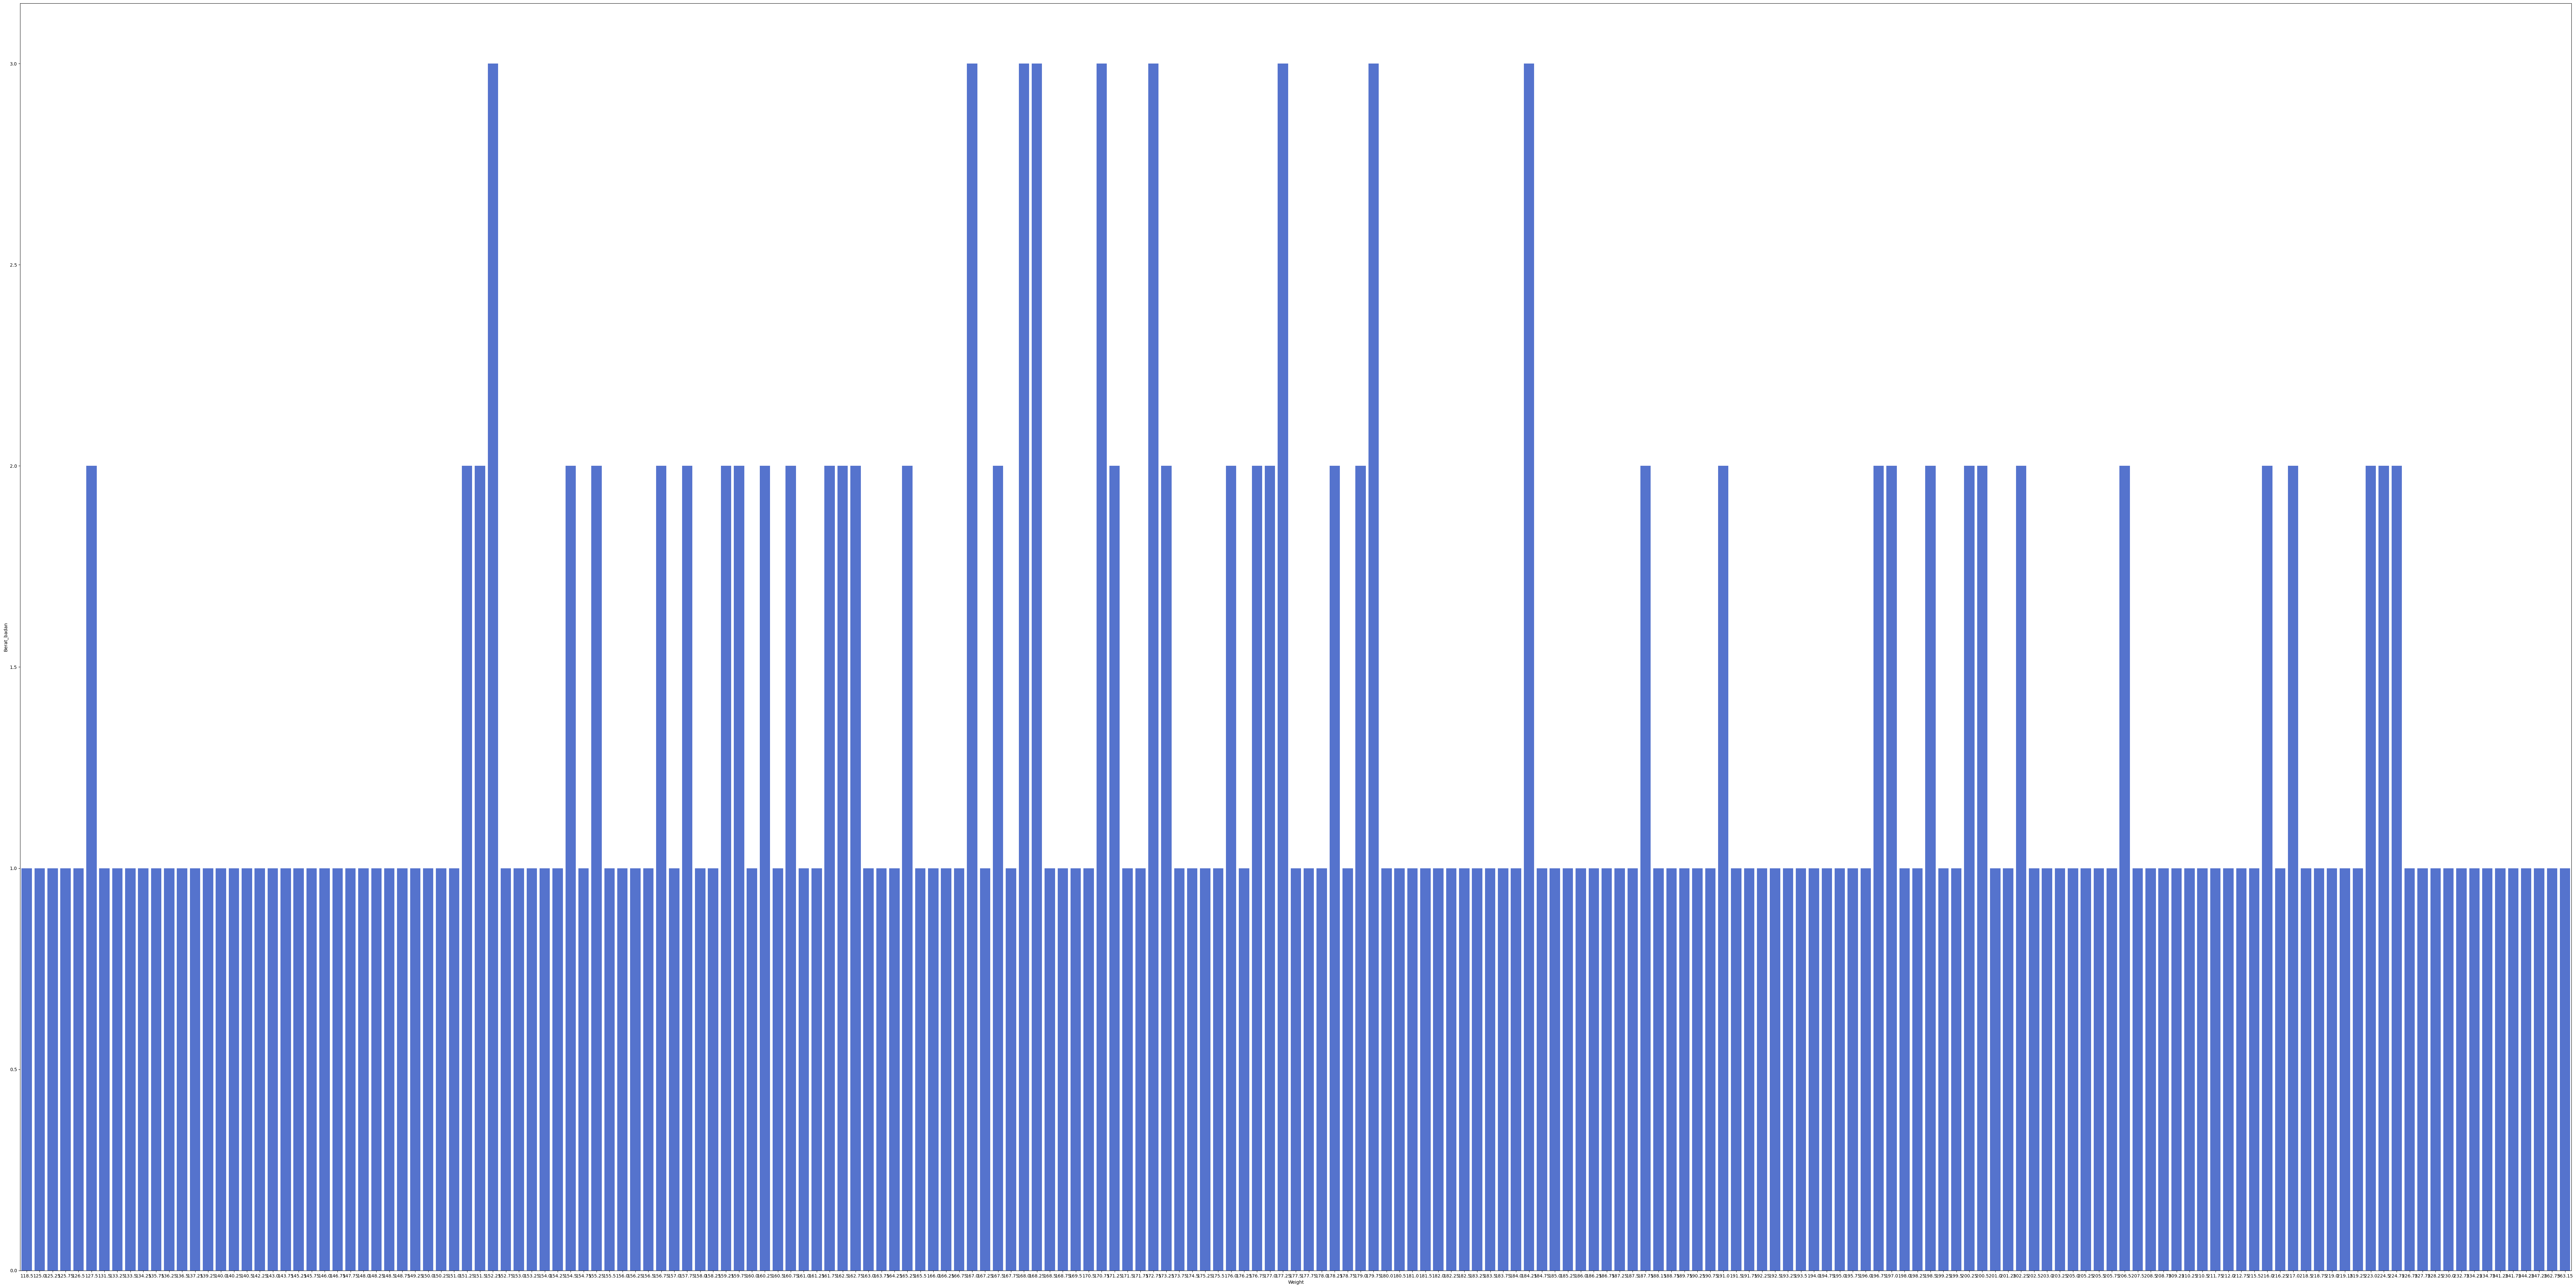

In [12]:
plt.figure(figsize=(100,50))
sns.barplot(x=Berat_badan['Weight'], y=Berat_badan['Berat_badan'], color='royalblue')

In [13]:
Tinggi_badan = df.groupby('Height').count()[['Thigh']].sort_values(by='Thigh',ascending=True).reset_index()
Tinggi_badan = Tinggi_badan.rename(columns={'Thigh':'Tinggi'})

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47]),
 [Text(0, 0, '29.5'),
  Text(1, 0, '64.0'),
  Text(2, 0, '64.75'),
  Text(3, 0, '65.0'),
  Text(4, 0, '65.5'),
  Text(5, 0, '65.75'),
  Text(6, 0, '66.0'),
  Text(7, 0, '66.25'),
  Text(8, 0, '66.5'),
  Text(9, 0, '66.75'),
  Text(10, 0, '67.0'),
  Text(11, 0, '67.25'),
  Text(12, 0, '67.5'),
  Text(13, 0, '67.75'),
  Text(14, 0, '68.0'),
  Text(15, 0, '68.25'),
  Text(16, 0, '68.5'),
  Text(17, 0, '68.75'),
  Text(18, 0, '69.0'),
  Text(19, 0, '69.25'),
  Text(20, 0, '69.5'),
  Text(21, 0, '69.75'),
  Text(22, 0, '70.0'),
  Text(23, 0, '70.25'),
  Text(24, 0, '70.5'),
  Text(25, 0, '70.75'),
  Text(26, 0, '71.0'),
  Text(27, 0, '71.25'),
  Text(28, 0, '71.5'),
  Text(29, 0, '71.75'),
  Text(30, 0, '72.0'),
  Text(31, 0, '72.25'),
  Text(32, 0, '72.5'),
  Text(33, 0, '72.

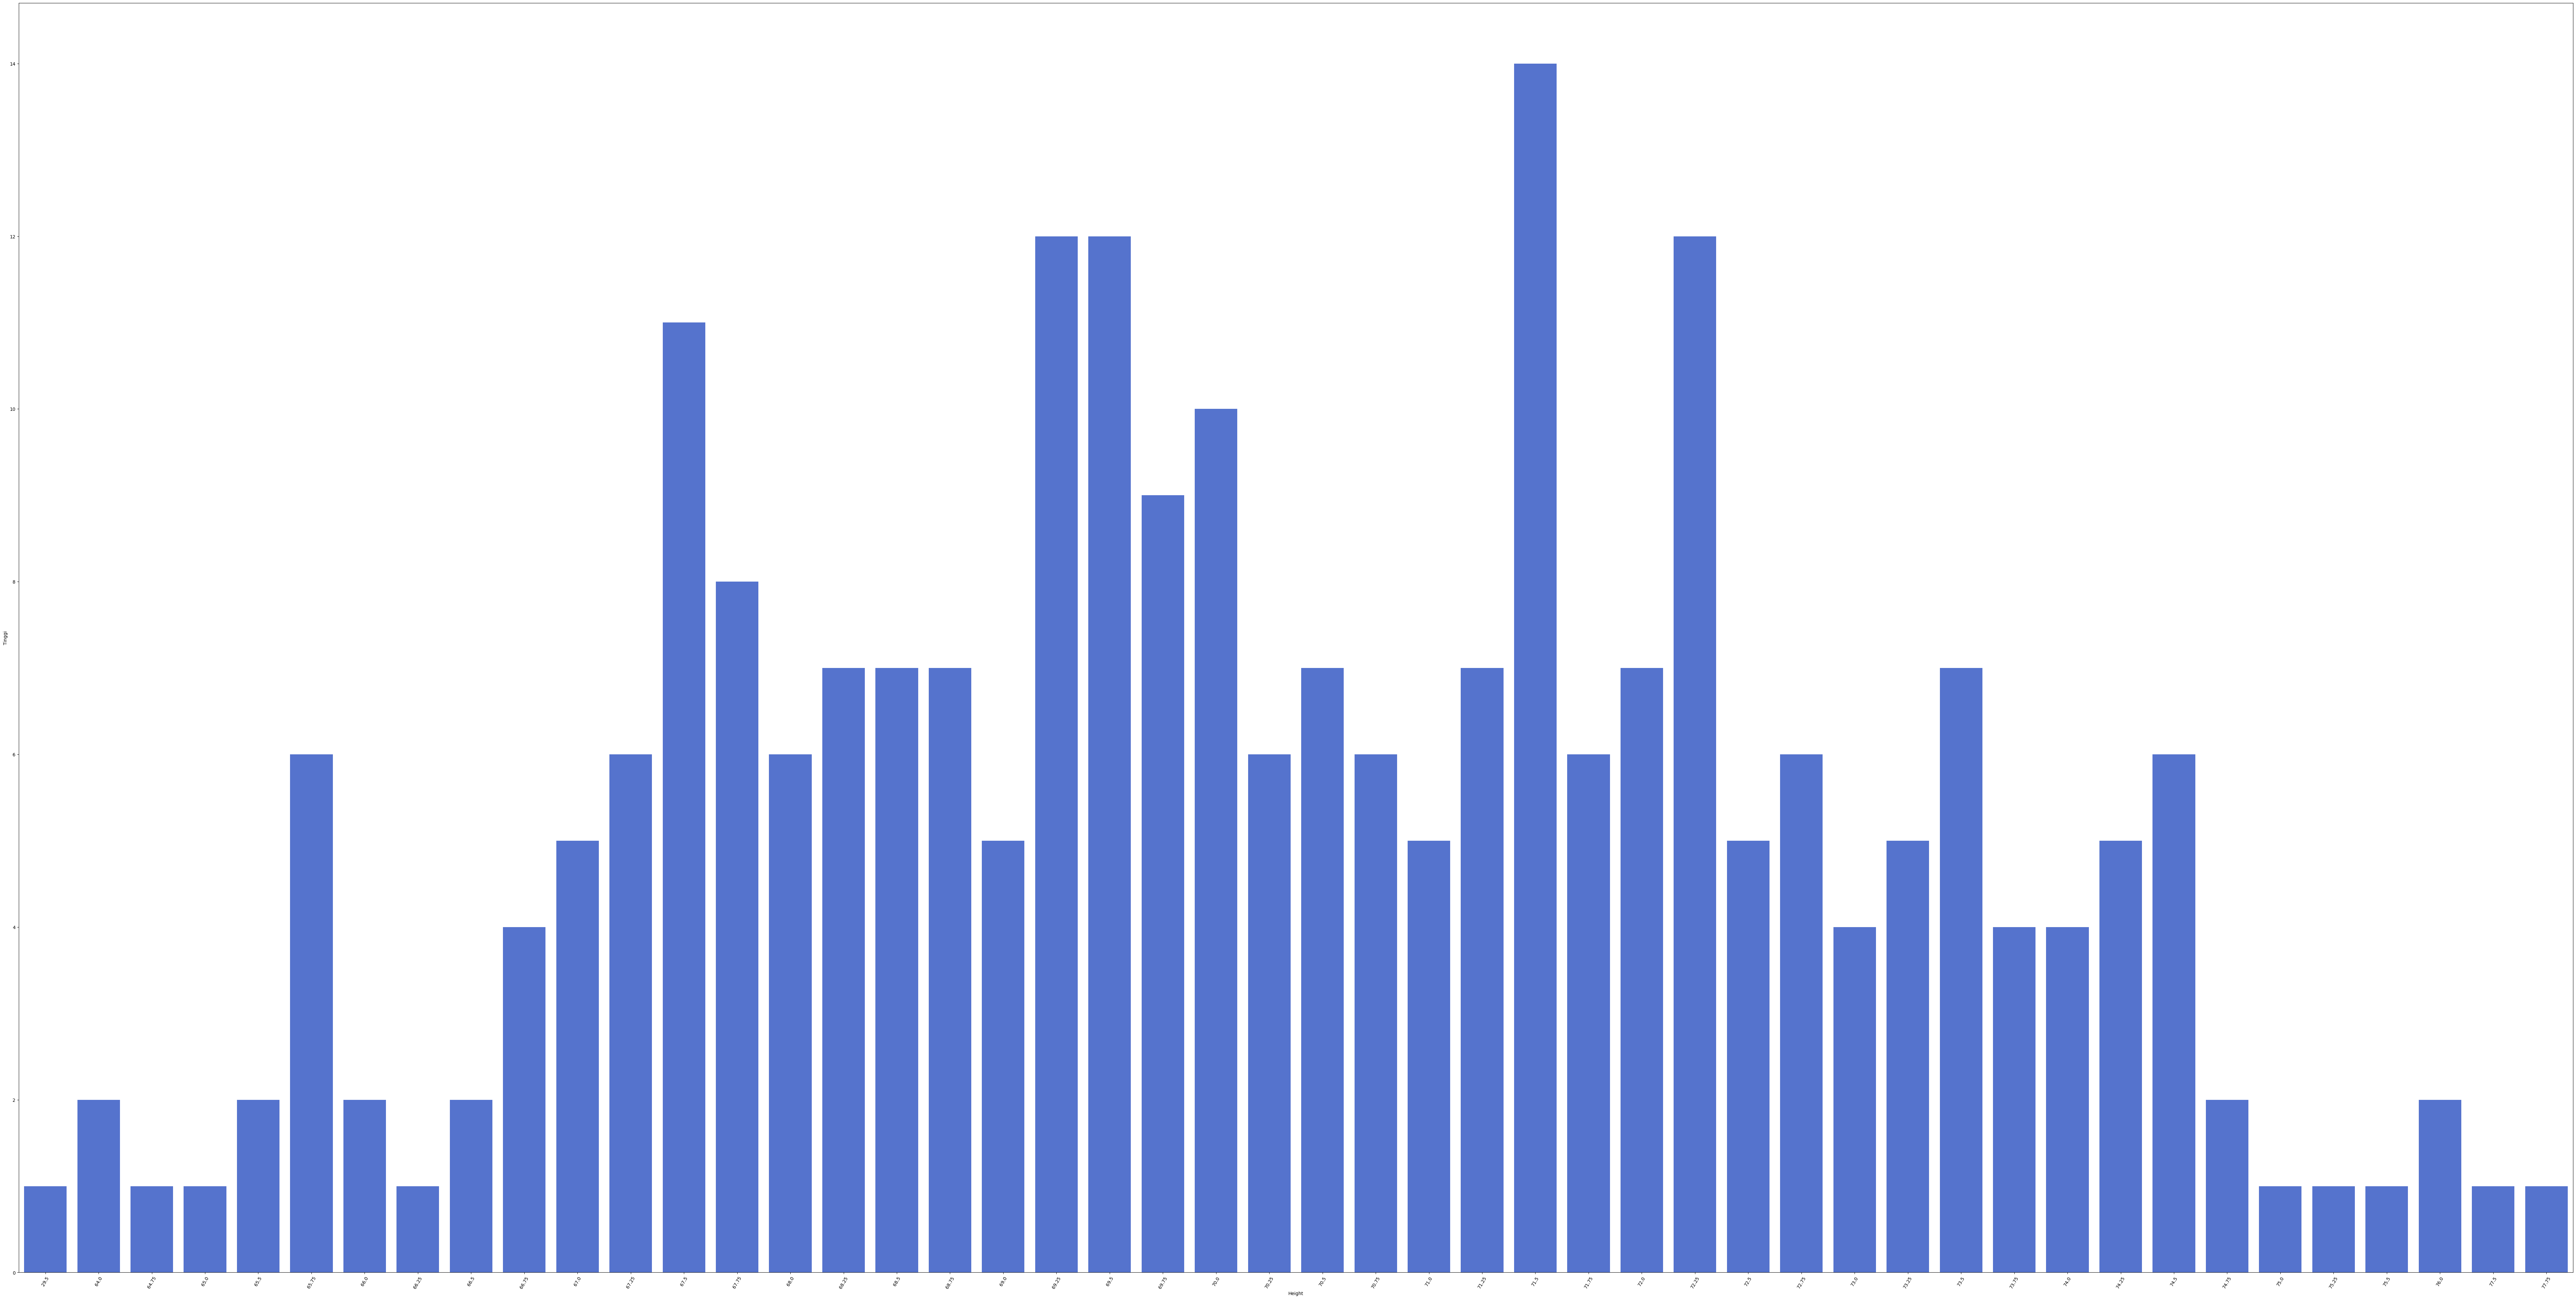

In [14]:
fig = plt.figure(figsize=(100,50))
sns.barplot(x=Tinggi_badan['Height'], y=Tinggi_badan['Tinggi'], color='royalblue')
plt.xticks(rotation=60)

In [15]:
features = ['Density','Age','Weight','Height','Neck','Chest','Abdomen','Hip','Thigh','Knee','Ankle','Biceps','Forearm','Wrist']
x = df[features]
y = df['BodyFat']
x.shape, y.shape

((252, 14), (252,))

In [16]:
x_train, X_test, y_train, y_test = train_test_split(x,y,random_state=70)
y_test.shape

(63,)

In [17]:
lr = LinearRegression()
lr.fit(x_train,y_train)
pred = lr.predict(X_test)

In [18]:
score = lr.score(X_test, y_test)
print('akurasi model regresi linier = ', score)

akurasi model regresi linier =  0.9909700768437055


In [19]:
input_data = np.array([[1.0708,23,154.25,67.75,36.2,93.1,85.2,94.5,59,37.3,21.9,32,27.4,17.1]])

prediction = lr.predict(input_data)
print('Estimasi BodyFat :', prediction)

Estimasi Total Diffusion : [11.87458955]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [20]:
import pickle

filename = 'estimasi_BodyFat.sav'
pickle.dump(lr,open(filename,'wb'))

In [21]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, pred)
print('r2 score for perfect model is', r2)

r2 score for perfect model is 0.9909700768437055
